In [1]:
import osmnx as ox
import networkx as nx
import numpy as np

import helper_functions as hf
import importlib
importlib.reload(hf)

<module 'helper_functions' from '/home/lema/Documents/diplomska/dai/helper_functions.py'>

In [2]:
place = 'Kamppi, Helsinki, Finland'
graph_ox = ox.graph_from_place(place,network_type='drive')

# print(type(graph_ox))
# fig, ax = ox.plot_graph(graph_ox,edge_color='y')

graph = nx.convert_node_labels_to_integers(nx.DiGraph(graph_ox))
# graph.nodes()
# graph.edges(data=True)



hf.fill_maxspeed(graph)

graph.edges(data=True)
times = {e: graph.edges()[e]["length"]/graph.edges()[e]["maxspeed"] for e in graph.edges()}
capacities = {e: 1 + graph.edges()[e]["length"]*graph.edges()[e]["maxspeed"]/1000 for e in graph.edges()}
nx.set_edge_attributes(graph, times,"c")
nx.set_edge_attributes(graph, capacities,"cap")

living_street is set to 30
living_street is set to 30
residential is set to 30
residential is set to 30
living_street is set to 30
living_street is set to 30


array([[<AxesSubplot: title={'center': 'cap'}>]], dtype=object)

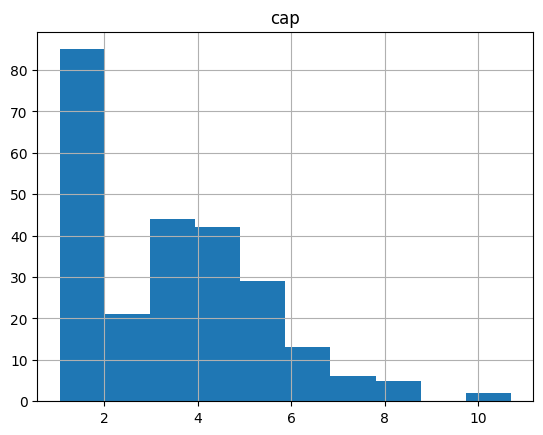

In [5]:
graph.edges(data=True)
df = nx.to_pandas_edgelist(graph, nodelist=graph.nodes())
df[["cap"]].hist(bins=10)

In [6]:
graph.nodes(data=True)
# df = nx.to_pandas_nodelist(graph, nodelist=graph.nodes())
# df[["cap"]].hist(bins=10)
# df

NodeDataView({0: {'y': 60.1647939, 'x': 24.9210566, 'street_count': 4}, 1: {'y': 60.1636645, 'x': 24.9210282, 'street_count': 4}, 2: {'y': 60.164631, 'x': 24.9212859, 'street_count': 3}, 3: {'y': 60.1643255, 'x': 24.9370233, 'street_count': 4}, 4: {'y': 60.1659479, 'x': 24.9416738, 'street_count': 4}, 5: {'y': 60.1651348, 'x': 24.939344, 'highway': 'traffic_signals', 'street_count': 4}, 6: {'y': 60.1653511, 'x': 24.9355842, 'street_count': 4}, 7: {'y': 60.1634458, 'x': 24.9345002, 'street_count': 4}, 8: {'y': 60.1711426, 'x': 24.9324437, 'street_count': 4}, 9: {'y': 60.1694182, 'x': 24.9273621, 'street_count': 3}, 10: {'y': 60.1707248, 'x': 24.9315761, 'street_count': 3}, 11: {'y': 60.1664916, 'x': 24.9306919, 'street_count': 4}, 12: {'y': 60.1669427, 'x': 24.9272265, 'highway': 'traffic_signals', 'street_count': 3}, 13: {'y': 60.1641708, 'x': 24.9266982, 'street_count': 4}, 14: {'y': 60.1657346, 'x': 24.9261818, 'street_count': 1}, 15: {'y': 60.1636339, 'x': 24.9274293, 'street_count'

In [3]:
# obj,constraints,vp = hf.init_from_graph(graph,[(0,3,1),(0,4,3),(0,5,2)])
obj,constraints,vp = hf.init_from_graph(graph,[(15,91,5)])

# hf.plot_multigraph(graph, with_labels=True, font_size=10)

[1. 0. 1. 6. 5. 5. 6. 5. 5. 5. 5. 5. 3. 6. 6. 6. 4. 4. 2. 3. 0. 0. 0. 4.
 4. 8. 2. 3. 2. 4. 3. 3. 2. 6. 5. 2. 0. 5. 3. 5. 3. 5. 6. 3. 0. 3. 3. 1.
 1. 8. 1. 0. 1. 1. 1. 3. 1. 3. 1. 1. 3. 2. 0. 1. 3. 3. 1. 2. 3. 1. 0. 4.
 3. 0. 3. 0. 0. 1. 5. 5. 3. 0. 0. 3. 0. 1. 1. 0. 1. 3. 1. 4. 4. 2. 2. 1.
 1. 3. 0. 8. 2. 1. 3. 3. 0. 0. 2. 0. 4. 0. 0. 0. 0. 1. 0. 6. 0. 1. 1. 0.
 0. 0. 1. 1. 3. 1. 1. 0. 1. 0. 1. 3. 1. 2. 3. 8. 1. 5. 3. 2. 2. 3. 2. 5.
 4. 4. 5. 4. 1. 3. 1. 2. 3. 0. 0. 0. 1. 2. 4. 4. 3. 3. 0. 8. 5. 2. 3. 3.
 3. 5. 3. 2. 8. 8. 3. 6. 4. 2. 4. 2. 6. 4. 0. 2. 1. 1. 3. 1. 4. 2. 1. 0.
 0. 3. 4. 6. 6. 3. 2. 3. 6. 2. 3. 3. 3. 3. 2. 0. 3. 5. 7. 2. 3. 5. 5. 3.
 4. 5. 2. 5. 3. 5. 3. 5. 5. 7. 5. 0. 3. 6. 0. 3. 1. 0. 2. 3. 0. 6. 0. 2.
 1. 0. 1. 0. 1. 3. 1.]
[ 2.  1.  2. 10.  5.  5.  6.  5.  5.  5.  5.  5.  4.  6.  6.  6.  4.  4.
  3.  4.  1.  1.  1.  4.  4.  8.  3.  4.  2.  4.  4.  3.  3.  6.  5.  2.
  1.  5.  3.  5.  4.  5.  6.  3.  1.  3.  4.  2.  1.  8.  1.  1.  1.  1.
  1.  3.  1.  4.  2.  2.  3.

In [10]:
# from networkx.drawing.nx_agraph import write_dot
# write_dot(graph,'multi.dot')

In [15]:
# nx.write_latex(graph,"latex_graph.txt")
# from network2tikz import plot
# plot(graph,'mypdf.pdf')

In [7]:
list(graph.edges())[179]

(92, 91)

[(0, 3225.0)]


/home/lema/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


39 7.275957614183426e-12
****[(True, 20.0), (True, 20.0)]
39 7.275957614183426e-12
******[(False, 20.0), (False, 20.0), (True, 20.0)]
51 9.5367431640625e-07
********[(False, 20.0), (False, 25.0), (False, 25.0), (True, 20.0)]
51 3.814697265625e-06
**********[(False, 25.0), (False, 25.0), (True, 20.0), (True, 25.0), (True, 25.0)]
38 7.275957614183426e-12
************[(False, 25.0), (True, 20.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0)]
38 7.275957614183426e-12
**************[(True, 20.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0)]
39 7.275957614183426e-12
****************[(True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 32.0), (True, 32.0)]
45 7.275957614183426e-12
******************[(False, 29.0), (False, 29.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 25.0), (True, 32.0), (True, 32.0)]
conservation of flow constraint couldn't be satisfied at LD - infeasible
**********

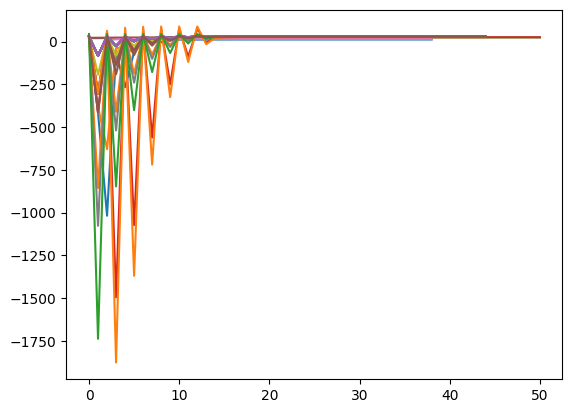

In [4]:
n_best = hf.run(obj,constraints,vp,graph,MAX_ITER=40,MAX_ITER_LR=50)
# TODO LB je prevelik, ker obstaja pot s ceno 24

In [42]:
# LB, UB, X_best = hf.run2(obj,constraints,vp,MAX_ITER=1000)
# print(LB,UB,X_best)

In [13]:
n_best.sol["z"]

28.0

k	COLOR
0 	 b


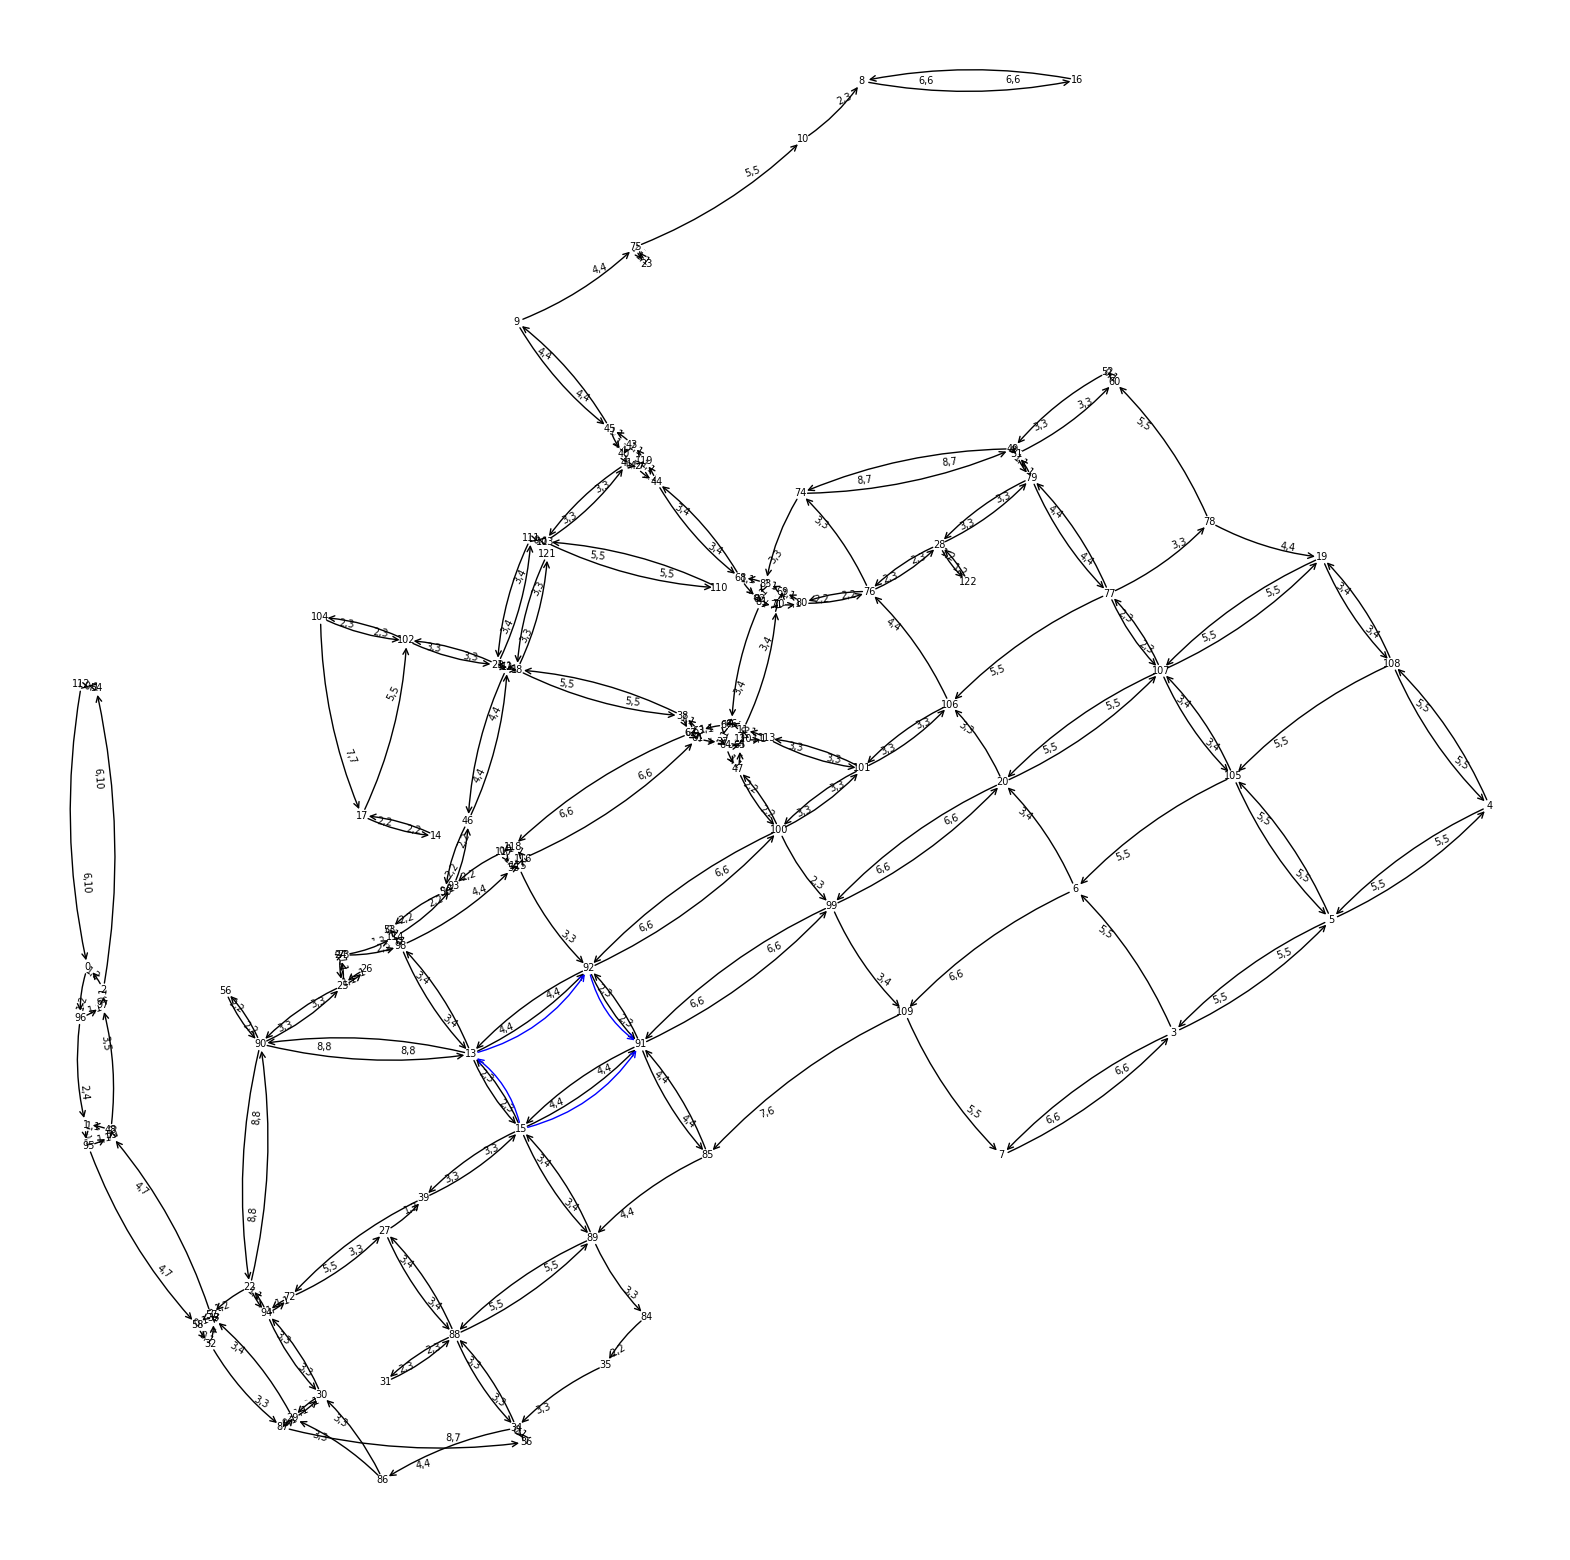

In [5]:
hf.plot_solution_graph(graph,n_best.sol["X"],with_labels=True,font_size=7)

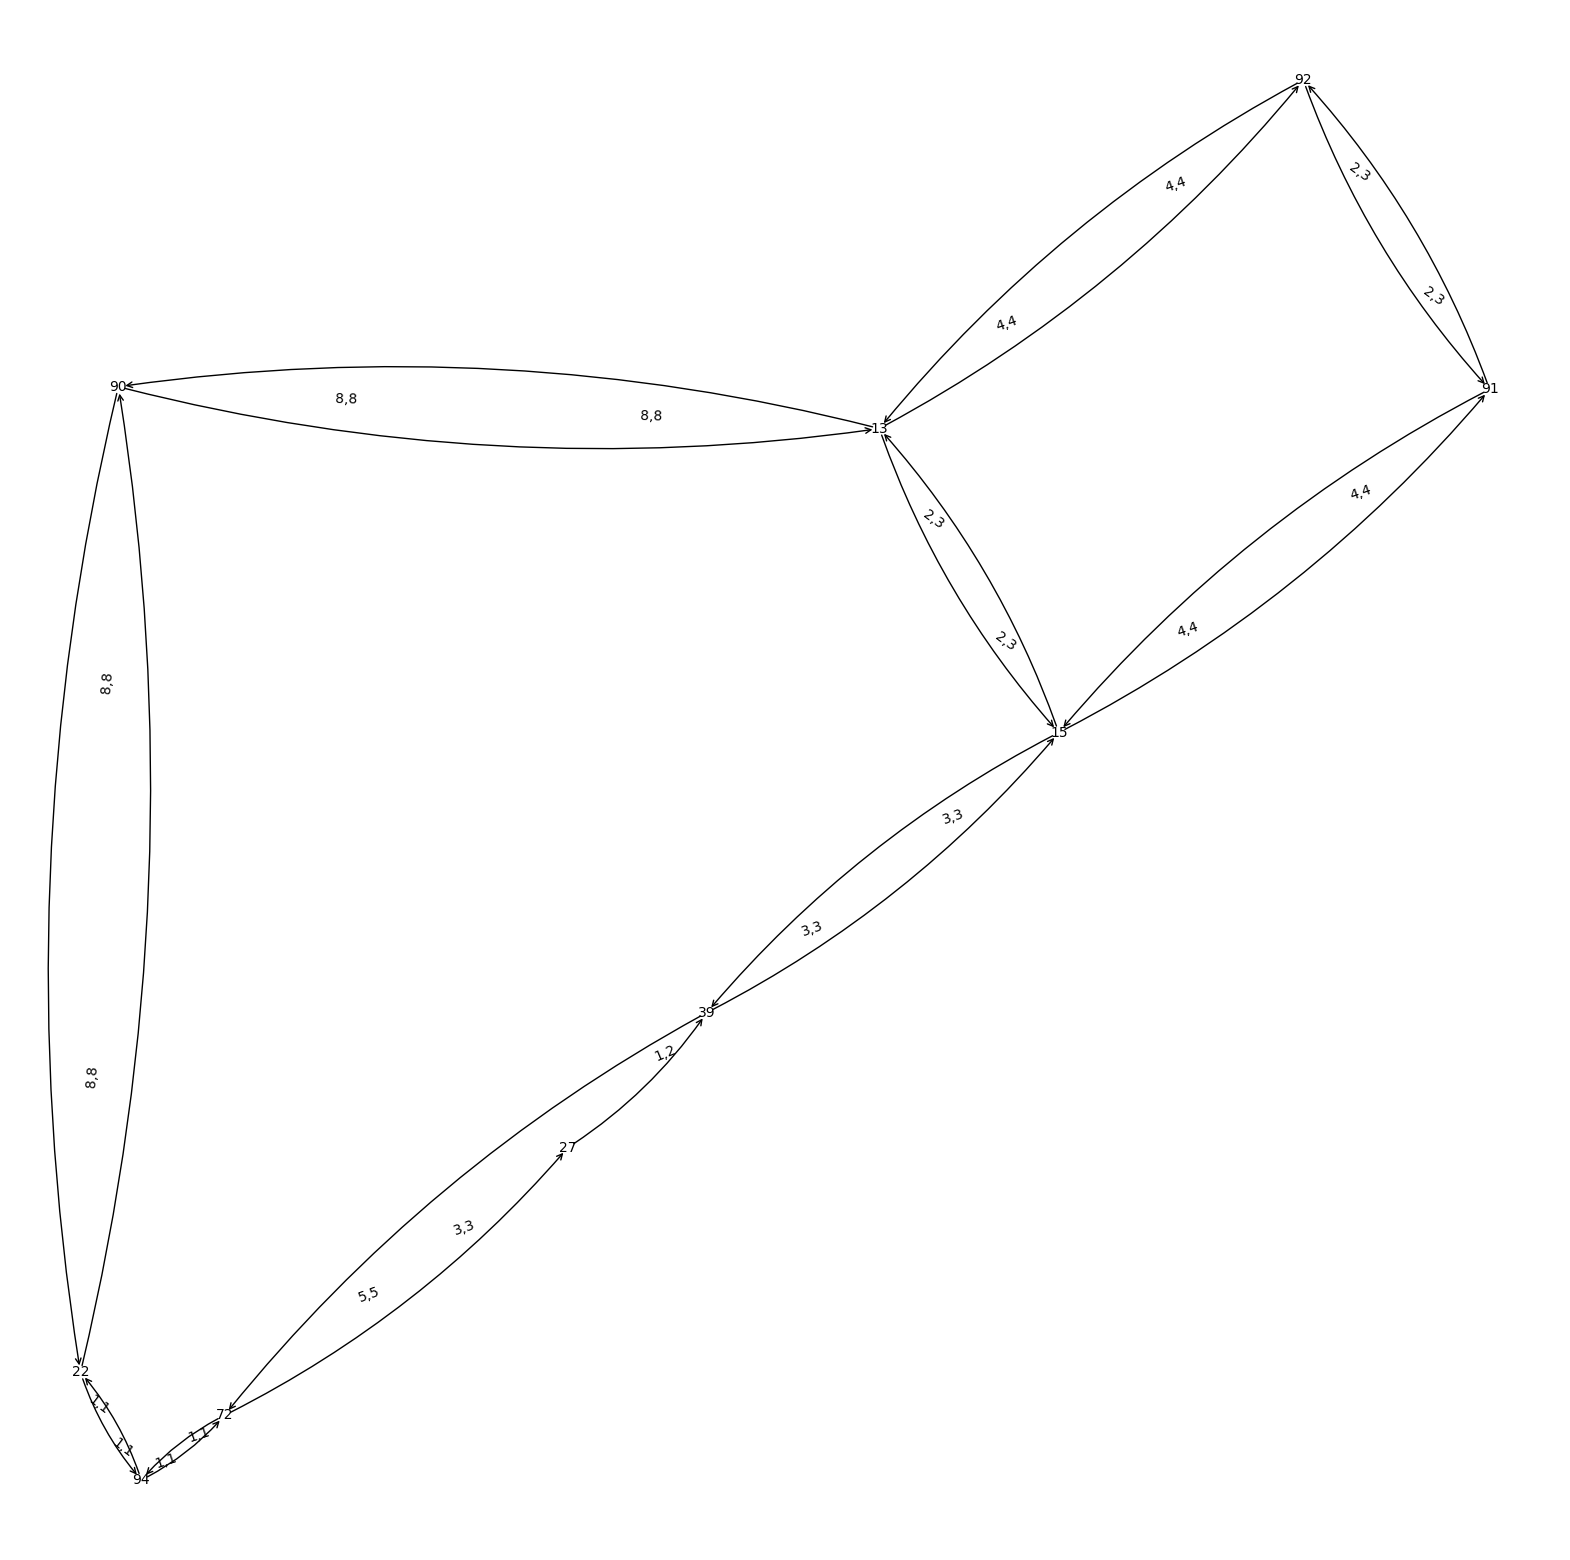

In [19]:

subgraph = graph.subgraph([92,91,15,13,39,27,72,94,22,90])
hf.plot_multigraph(subgraph, with_labels=True, font_size=10)

In [17]:
df = nx.to_pandas_edgelist(subgraph, nodelist=graph.nodes())
df

,source,target,lanes,length,reversed,cap,oneway,name,geometry,c,osmid,highway,maxspeed
0,13,92,NaN,117.546,False,4.52638,False,Eerikinkatu,"LINESTRING (24.9266982 60.1641708, 24.9268497 ...",3.918200,"[126894680, 126894676, 126894678, 126894679]",residential,30
1,13,90,2,243.683,"[False, True]",8.31049,False,"[Eerikinkatu, Köydenpunojankatu]","LINESTRING (24.9266982 60.1641708, 24.9265946 ...",8.122767,"[126897921, 42331490, 7715843, 42331491, 12689...",residential,30
2,13,15,NaN,72.231,False,3.16693,False,Hietalahdenkatu,"LINESTRING (24.9266982 60.1641708, 24.9267412 ...",2.407700,126894682,secondary,30
3,15,91,2,118.204,False,4.54612,False,Kalevankatu,"LINESTRING (24.9274293 60.1636339, 24.9275659 ...",3.940133,"[132423236, 132423237, 114554759, 15090664, 15...",residential,30
4,15,39,2,96.566,True,3.89698,False,Kalevankatu,"LINESTRING (24.9274293 60.1636339, 24.9273262 ...",3.218867,"[24673382, 37282870, 37282871]",residential,30
5,15,13,NaN,72.231,True,3.16693,False,Hietalahdenkatu,"LINESTRING (24.9274293 60.1636339, 24.9273703 ...",2.407700,126894682,secondary,30
6,22,94,NaN,25.210,True,1.75630,False,Ruoholahdenranta,"LINESTRING (24.9234431 60.1625041, 24.9234908 ...",0.840333,44960714,residential,30
7,22,90,2,235.802,"[False, True]",8.07406,False,"[Ruoholahdenkatu, Ruoholahdenranta]","LINESTRING (24.9234431 60.1625041, 24.9234036 ...",7.860067,"[125602434, 699860165, 125895847, 234469704, 2...",residential,30
8,27,39,1,41.618,False,2.24854,True,Kalevankatu,"LINESTRING (24.9254294 60.1629011, 24.9259458 ...",1.387267,126895736,residential,30
9,39,72,1,135.039,False,5.05117,True,Kalevankatu,"LINESTRING (24.9259947 60.1631392, 24.9259039 ...",4.501300,24673380,residential,30
